<a href="https://colab.research.google.com/github/ArchieFauzan/Pemrograman-python-semester-3/blob/main/Pertemuan_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Archie Fauzan Primanda 
1101190147

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [37]:
#Data 1
frek = 1800 #Mhz
frek1 = 700 #MHz
frek2 = 900 #MHz
tipe1 = 'urban'
tipe2 = 'suburban'
tipe3 = 'open'
ht = 80 #m
hr = 1.5 #m
jarakmax = 700 #m
jarakmin = 200 #m
n = 200 #titik
d = np.random.randint(jarakmin, jarakmax, n)
lp1 = cos(frek, tipe1, ht, hr, d)
lp2 = cos(frek, tipe2, ht, hr, d)
lp3 = cos(frek, tipe3, ht, hr, d)
lp_1 = cos(frek1, tipe1, ht, hr, d)
lp_2 = cos(frek2, tipe1, ht, hr, d)
lp_3 = cos(frek, tipe1, ht, hr, d)
dsort = d[np.argsort(d)]
urban_sort = lp1[np.argsort(d)]
suburban_sort = lp2[np.argsort(d)]
open_sort = lp3[np.argsort(d)]
urban_sort2 = lp_1[np.argsort(d)]
suburban_sort2 = lp_2[np.argsort(d)]
open_sort2 = lp_3[np.argsort(d)]

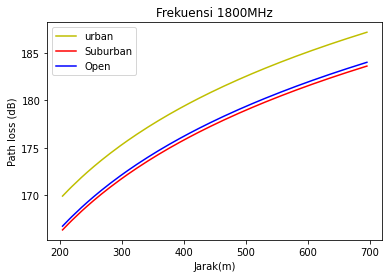

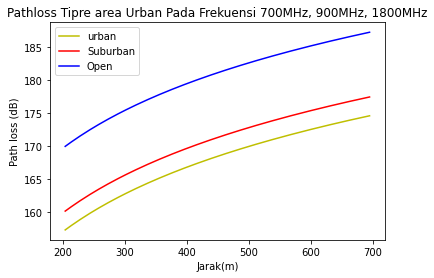

In [38]:
#grafik 1
plt.plot(dsort, urban_sort, 'y')
plt.plot(dsort, suburban_sort, 'r')
plt.plot(dsort, open_sort, 'b')
plt.title('Frekuensi 1800MHz')
plt.ylabel('Path loss (dB)')
plt.xlabel('Jarak(m)')
plt.legend(['urban', 'Suburban', 'Open'], loc='upper left')
plt.show()

#grafik 2
plt.plot(dsort, urban_sort2, 'y')
plt.plot(dsort, suburban_sort2, 'r')
plt.plot(dsort, open_sort2, 'b')
plt.title('Pathloss Tipre area Urban Pada Frekuensi 700MHz, 900MHz, 1800MHz')
plt.ylabel('Path loss (dB)')
plt.xlabel('Jarak(m)')
plt.legend(['urban', 'Suburban', 'Open'], loc='upper left')
plt.show()